# Chioma Udokwu
“Kansas State University has an Honor System based on personal integrity, which is presumed to be sufficient assurance in academic matters one's work is performed honestly and without unauthorized assistance. Undergraduate and graduate students, by registration, acknowledge the jurisdiction of the Honor System. The policies and procedures of the Honor System apply to all full and part-time students enrolled in undergraduate and graduate courses on-campus, off-campus, and via distance learning. The honor system website can be reach via the following URL: www.ksu.edu/honor (Links to an external site.)Links to an external site..

A component vital to the Honor System is the inclusion of the Honor Pledge which applies to all assignments, examinations, or other course work undertaken by students. The Honor Pledge is implied, whether or not it is stated: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." A grade of XF can result from a breach of academic honesty. The F indicates failure in the course; the X indicates the reason is an Honor Pledge violation.” (http://www.k-state.edu/provost/resources/teaching/course.htm (Links to an external site.)Links to an external site.)

In [309]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [310]:
# import titanic_train.csv
df =pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Essential Data Transformation¶¶
Finding out data type & missing values

In [311]:
#data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [312]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [313]:
# check the basic stat 
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26172a10>,
      dtype=object)

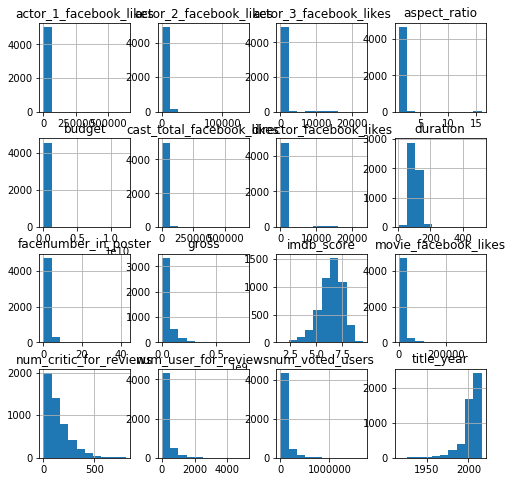

In [314]:
df.hist(figsize=(8,8))

In [315]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

### Analysis of thing that are make movies sucessful
I believe that some of the columns will not be useful in identfying what makes movies sucessful so ive decide to remove a mojarouity of those columns and from there. I will begin to clean up the data! Also I have includidn additional anaylsis below of different cloums that might be consider important in predicting a movies a success.



In [316]:
df['duration'].value_counts().head(10)

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
93.0     129
94.0     124
99.0     124
95.0     124
96.0     113
Name: duration, dtype: int64

In [317]:
df['content_rating'].describe()

count     4740
unique      18
top          R
freq      2118
Name: content_rating, dtype: object

In [318]:
df['num_voted_users'].value_counts().head(10)

57      5
6       4
6025    3
374     3
53      3
3119    3
62      3
162     3
2541    3
8       3
Name: num_voted_users, dtype: int64

In [319]:
df['budget'].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [320]:
df['num_user_for_reviews'].value_counts().head(10)

1.0     51
3.0     33
2.0     32
26.0    32
10.0    29
6.0     28
50.0    26
8.0     25
32.0    25
11.0    24
Name: num_user_for_reviews, dtype: int64

In [321]:
df['country'].describe()

count     5038
unique      65
top        USA
freq      3807
Name: country, dtype: object

In [322]:
df['imdb_score'].value_counts().head(10)

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
7.3    184
7.0    184
7.1    181
6.8    181
6.1    179
Name: imdb_score, dtype: int64

In [323]:
df['facenumber_in_poster'].describe()

count    5030.000000
mean        1.371173
std         2.013576
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64

In [324]:
df['num_critic_for_reviews'].value_counts().head(10)

1.0     43
9.0     37
5.0     36
10.0    35
8.0     35
12.0    34
16.0    33
81.0    33
43.0    31
29.0    30
Name: num_critic_for_reviews, dtype: int64

In [325]:
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


# Remove (unnessary) columns

In [326]:
# remove an unnecessary column 
df = df.drop(['color','director_facebook_likes','language','plot_keywords','movie_imdb_link','aspect_ratio'], axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,Wes Studi,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,Stephanie Sigman,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [327]:
# how many missing values in each column or variable
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [328]:
#handling missing value: remove the rows with any missing value
df_rev = df.dropna()
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 5042
Data columns (total 22 columns):
director_name                3827 non-null object
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_2_name                 3827 non-null object
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
genres                       3827 non-null object
actor_1_name                 3827 non-null object
movie_title                  3827 non-null object
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
actor_3_name                 3827 non-null object
facenumber_in_poster         3827 non-null float64
num_user_for_reviews         3827 non-null float64
country                      3827 non-null object
content_rating               3827 non-null object
budget                       3827 non-

If i take this ction and aggresivly drop every missing vaule then I'll be losing a lot of information so i have decided to replace as many missing vaules as possible.

In [329]:
# remove an unnecessary column 
df = df.drop(['director_name','actor_3_facebook_likes', 'actor_1_facebook_likes','actor_2_facebook_likes'], axis=1)
df.head()

,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,USA,PG-13,237000000.0,2009.0,7.9,33000
1,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,USA,PG-13,300000000.0,2007.0,7.1,0
2,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,UK,PG-13,245000000.0,2015.0,6.8,85000
3,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,PG-13,250000000.0,2012.0,8.5,164000
4,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,7.1,0


In [330]:
df.isnull().sum()

num_critic_for_reviews        50
duration                      15
actor_2_name                  13
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [331]:
df['duration'].median()

103.0

In [332]:
# replace null value with the median value 
df = df.fillna({'duration': 103.0})
df.isnull().sum()

num_critic_for_reviews        50
duration                       0
actor_2_name                  13
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [333]:
df['gross'].median()

25517500.0

In [334]:
# replace null value with the median value 
df = df.fillna({'gross': 25517500.0})
df.isnull().sum()

num_critic_for_reviews        50
duration                       0
actor_2_name                  13
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [335]:
df['budget'].median()

20000000.0

In [336]:
# replace null value with the median value 
df = df.fillna({'budget': 20000000.0})
df.isnull().sum()

num_critic_for_reviews        50
duration                       0
actor_2_name                  13
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
country                        5
content_rating               303
budget                         0
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       4993 non-null float64
duration                     5043 non-null float64
actor_2_name                 5030 non-null object
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
country                      5038 non-null object
content_rating               4740 non-null object
budget                       5043 non-null float64
title_year                   4935 non-null float64
imdb_score                   5043 non-null float64
movie_facebook_likes         5043 non

In [338]:
#handling missing value: remove the rows with any missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       4635 non-null float64
duration                     4635 non-null float64
actor_2_name                 4635 non-null object
gross                        4635 non-null float64
genres                       4635 non-null object
actor_1_name                 4635 non-null object
movie_title                  4635 non-null object
num_voted_users              4635 non-null int64
cast_total_facebook_likes    4635 non-null int64
actor_3_name                 4635 non-null object
facenumber_in_poster         4635 non-null float64
num_user_for_reviews         4635 non-null float64
country                      4635 non-null object
content_rating               4635 non-null object
budget                       4635 non-null float64
title_year                   4635 non-null float64
imdb_score                   4635 non-null float64
movie_facebook_likes         4635 non

In [339]:
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
actor_2_name                 0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [340]:
df.head()

,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,USA,PG-13,237000000.0,2009.0,7.9,33000
1,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,USA,PG-13,300000000.0,2007.0,7.1,0
2,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,UK,PG-13,245000000.0,2015.0,6.8,85000
3,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,PG-13,250000000.0,2012.0,8.5,164000
5,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,USA,PG-13,263700000.0,2012.0,6.6,24000


In [341]:
df.corr()

,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.244898,0.478150,0.614915,0.264976,-0.033350,0.594045,0.117046,0.318967,0.343321,0.690356
duration,0.244898,1.000000,0.248589,0.341229,0.129544,0.021970,0.353110,0.072558,-0.128147,0.363811,0.213670
gross,0.478150,0.248589,1.000000,0.634328,0.250877,-0.024897,0.559087,0.109483,0.054354,0.191991,0.376624
num_voted_users,0.614915,0.341229,0.634328,1.000000,0.268812,-0.027782,0.792996,0.078235,0.026357,0.444035,0.530316
cast_total_facebook_likes,0.264976,0.129544,0.250877,0.268812,1.000000,0.085019,0.204950,0.037827,0.126539,0.100902,0.215822
facenumber_in_poster,-0.033350,0.021970,-0.024897,-0.027782,0.085019,1.000000,-0.072398,-0.018801,0.061615,-0.072753,0.010724
num_user_for_reviews,0.594045,0.353110,0.559087,0.792996,0.204950,-0.072398,1.000000,0.082914,0.016792,0.316313,0.391153
budget,0.117046,0.072558,0.109483,0.078235,0.037827,-0.018801,0.082914,1.000000,0.047261,0.030023,0.060350
title_year,0.318967,-0.128147,0.054354,0.026357,0.126539,0.061615,0.016792,0.047261,1.000000,-0.213882,0.237801
imdb_score,0.343321,0.363811,0.191991,0.444035,0.100902,-0.072753,0.316313,0.030023,-0.213882,1.000000,0.261016


In [342]:
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.444035
duration,0.363811
num_critic_for_reviews,0.343321
num_user_for_reviews,0.316313
movie_facebook_likes,0.261016
gross,0.191991
cast_total_facebook_likes,0.100902
budget,0.030023
facenumber_in_poster,-0.072753
title_year,-0.213882


# Data Visualization with Pandas & Matplotlib

In [343]:
df.columns

Index([u'num_critic_for_reviews', u'duration', u'actor_2_name', u'gross',
       u'genres', u'actor_1_name', u'movie_title', u'num_voted_users',
       u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster',
       u'num_user_for_reviews', u'country', u'content_rating', u'budget',
       u'title_year', u'imdb_score', u'movie_facebook_likes'],
      dtype='object')

In [344]:
# remove an unnecessary column 
df = df.drop(['actor_2_name','actor_1_name','actor_3_name', 'cast_total_facebook_likes','title_year'], axis=1)
df.head()

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,1238.0,USA,PG-13,300000000.0,7.1,0
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,1.0,994.0,UK,PG-13,245000000.0,6.8,85000
3,813.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,0.0,2701.0,USA,PG-13,250000000.0,8.5,164000
5,462.0,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1.0,738.0,USA,PG-13,263700000.0,6.6,24000


In [345]:
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.444035
duration,0.363811
num_critic_for_reviews,0.343321
num_user_for_reviews,0.316313
movie_facebook_likes,0.261016
gross,0.191991
budget,0.030023
facenumber_in_poster,-0.072753


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25df19d0>,
      dtype=object)

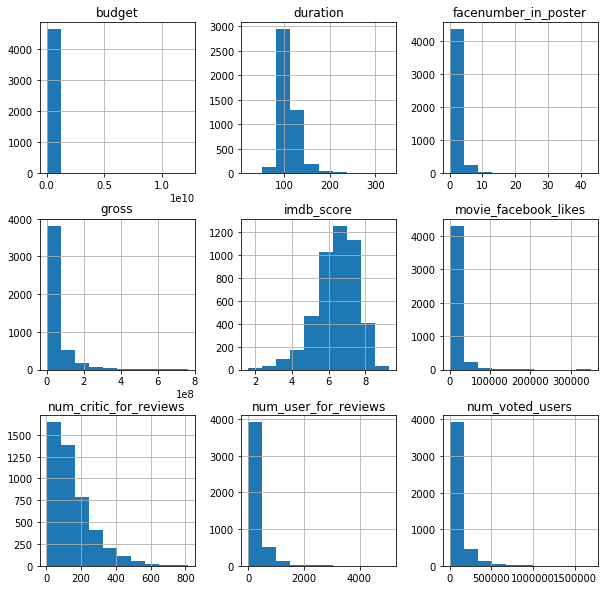

In [346]:
# histogram for all numerical columns
df.hist(figsize=(10,10))

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

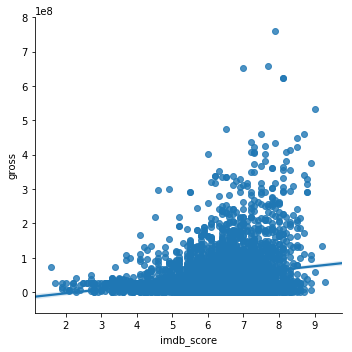

In [348]:
# linear regression & scatter chart 
sns.lmplot("imdb_score", "gross", df)

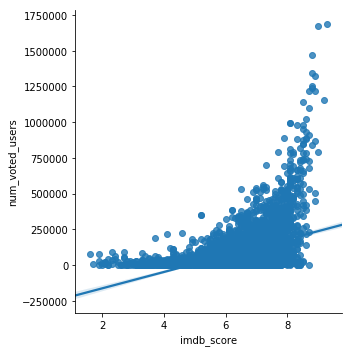

In [349]:
# linear regression & scatter chart 
sns.lmplot("imdb_score", "num_voted_users", df)

# Business Intelligence

In [350]:
df.index

Int64Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
            ...
            5024, 5025, 5026, 5027, 5033, 5034, 5035, 5037, 5041, 5042],
           dtype='int64', length=4635)

In [351]:
df.sort_values('gross', ascending=False).head(2)

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000
26,315.0,194.0,658672302.0,Drama|Romance,Titanic,793059,0.0,2528.0,USA,PG-13,200000000.0,7.7,26000


In [352]:
df.sort_values(['num_user_for_reviews', 'num_critic_for_reviews'], ascending=[0,1])

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes
270,297.0,171.0,313837577.0,Action|Adventure|Drama|Fantasy,The Lord of the Rings: The Fellowship of the R...,1238746,2.0,5060.0,New Zealand,PG-13,93000000.0,8.8,21000
66,645.0,152.0,533316061.0,Action|Crime|Drama|Thriller,The Dark Knight,1676169,0.0,4667.0,USA,PG-13,185000000.0,9.0,37000
1937,199.0,142.0,28341469.0,Crime|Drama,The Shawshank Redemption,1689764,0.0,4144.0,USA,R,25000000.0,9.3,108000
654,313.0,136.0,171383253.0,Action|Sci-Fi,The Matrix,1217752,3.0,3646.0,USA,R,63000000.0,8.7,25000
240,320.0,136.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Star Wars: Episode I - The Phantom Menace,534658,1.0,3597.0,USA,PG,115000000.0,6.5,13000
237,284.0,142.0,310675583.0,Action|Adventure|Fantasy|Sci-Fi,Star Wars: Episode II - Attack of the Clones,464310,3.0,3516.0,USA,PG,115000000.0,6.7,0
4707,360.0,81.0,140530114.0,Horror,The Blair Witch Project,186786,0.0,3400.0,USA,R,60000.0,6.4,0
236,359.0,140.0,380262555.0,Action|Adventure|Fantasy|Sci-Fi,Star Wars: Episode III - Revenge of the Sith,520104,4.0,3286.0,USA,PG-13,113000000.0,7.6,10000
339,328.0,192.0,377019252.0,Action|Adventure|Drama|Fantasy,The Lord of the Rings: The Return of the King,1215718,2.0,3189.0,USA,PG-13,94000000.0,8.9,16000
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000


In [353]:
df.count()

num_critic_for_reviews    4635
duration                  4635
gross                     4635
genres                    4635
movie_title               4635
num_voted_users           4635
facenumber_in_poster      4635
num_user_for_reviews      4635
country                   4635
content_rating            4635
budget                    4635
imdb_score                4635
movie_facebook_likes      4635
dtype: int64

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

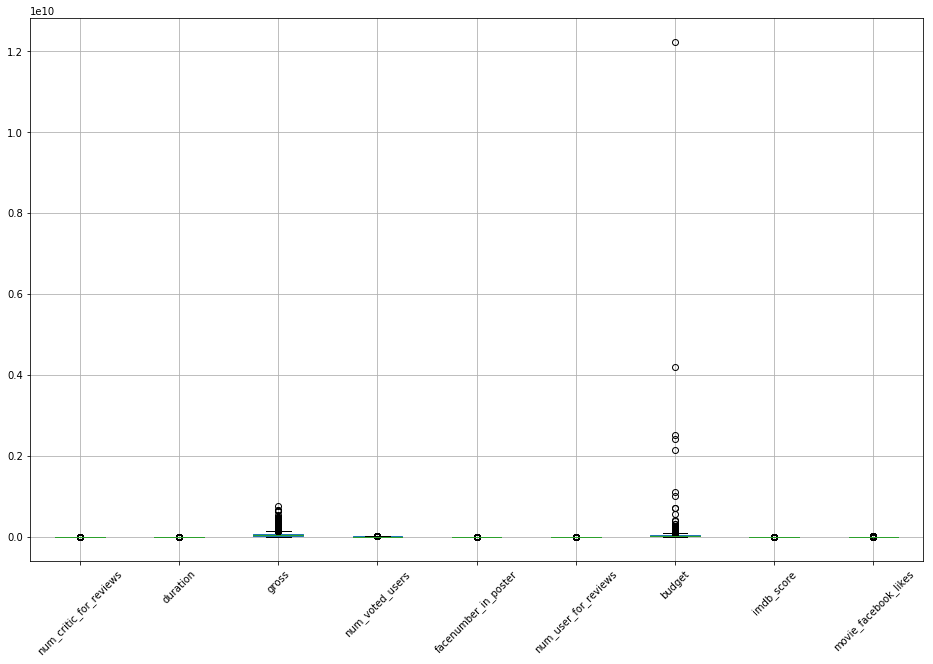

In [354]:
plt.figure(figsize=(16,10))
df.boxplot()
plt.xticks(rotation=45)

In [355]:
df.columns

Index([u'num_critic_for_reviews', u'duration', u'gross', u'genres',
       u'movie_title', u'num_voted_users', u'facenumber_in_poster',
       u'num_user_for_reviews', u'country', u'content_rating', u'budget',
       u'imdb_score', u'movie_facebook_likes'],
      dtype='object')

In [356]:
df['num_critic_for_reviews'].sum()

689863.0

In [357]:
df['gross'].sum()

215077541498.0

In [358]:
df['num_voted_users'].sum()

416814819

In [359]:
df['num_user_for_reviews'].sum()

1350703.0

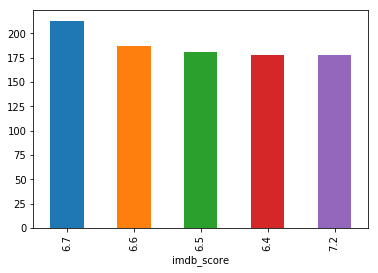

In [360]:
df.groupby('imdb_score').size().sort_values(ascending=False).head().plot(kind='bar')

In [361]:
df.groupby('imdb_score')['movie_title'].sum().sort_values(ascending=False).head()

imdb_score
4.6    Yogi Bear Dr. Dolittle 2 The Twilight Saga: Ne...
8.0    X-Men: Days of Future Past Ratatouille Star Tr...
4.8    Wild Wild West Charlie's Angels: Full Throttle...
8.4    WALL·E Braveheart Amélie Lion of the Desert St...
2.0                   United Passions Who's Your Caddy? 
Name: movie_title, dtype: object

# Part 2 of Finale Project

## Model Development: Regression

In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [363]:
df.head()

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,1238.0,USA,PG-13,300000000.0,7.1,0
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,1.0,994.0,UK,PG-13,245000000.0,6.8,85000
3,813.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,0.0,2701.0,USA,PG-13,250000000.0,8.5,164000
5,462.0,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1.0,738.0,USA,PG-13,263700000.0,6.6,24000


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews    4635 non-null float64
duration                  4635 non-null float64
gross                     4635 non-null float64
genres                    4635 non-null object
movie_title               4635 non-null object
num_voted_users           4635 non-null int64
facenumber_in_poster      4635 non-null float64
num_user_for_reviews      4635 non-null float64
country                   4635 non-null object
content_rating            4635 non-null object
budget                    4635 non-null float64
imdb_score                4635 non-null float64
movie_facebook_likes      4635 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 507.0+ KB


In [365]:
df5 = df.drop(['genres', 'movie_title', 'country','content_rating'], axis=1)
df5.head(2)

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,886204,0.0,3054.0,237000000.0,7.9,33000
1,302.0,169.0,309404152.0,471220,0.0,1238.0,300000000.0,7.1,0


In [366]:
#assigning columns to X and Y variables
X = df5.drop(['imdb_score'], axis =1)
y = df5['imdb_score'] 

In [367]:
#Fit the model
model1 = linear_model.Lasso(alpha=1)             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

In [368]:
# The coefficients
print 'Coefficients: ', model1.coef_
# y-intercept
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.63156948e-03  1.05209506e-02 -2.83660833e-09  4.14693680e-06
 -0.00000000e+00 -4.78812631e-04 -6.60130338e-11 -3.44655444e-06]
y-intercept  4.966241857377383


In [369]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.011'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('movie_facebook_likes', '-0.000')]

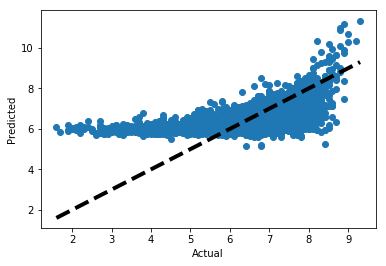

In [370]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model Evaluation

In [371]:
print "mean square error: ", mean_squared_error(y, model1_y)
print explained_variance_score(y, model1_y)

mean square error:  0.8723374980744721
0.2844658694375365


## Recursive Feature Selection (RFE): Another Feature Selection Method

In [372]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'duration'), (1, 'facenumber_in_poster'), (2, 'num_critic_for_reviews'), (3, 'num_user_for_reviews'), (4, 'movie_facebook_likes'), (5, 'num_voted_users'), (6, 'gross'), (7, 'budget')]


In [373]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
X = df5.drop(['imdb_score'], axis =1)
y = df5['imdb_score'] 

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.1181346278317152
variance or r-squared:  0.9031966141927893


In [374]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.034338401021299605, 'facenumber_in_poster'),
 (0.05280459822299046, 'movie_facebook_likes'),
 (0.08440081585728101, 'num_critic_for_reviews'),
 (0.09609743948172561, 'num_user_for_reviews'),
 (0.10708732996964221, 'gross'),
 (0.1370411888350561, 'budget'),
 (0.15241808248526695, 'duration'),
 (0.33581214412673804, 'num_voted_users')]

## Classification

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
#import scikitplot as skplt

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews    4635 non-null float64
duration                  4635 non-null float64
gross                     4635 non-null float64
genres                    4635 non-null object
movie_title               4635 non-null object
num_voted_users           4635 non-null int64
facenumber_in_poster      4635 non-null float64
num_user_for_reviews      4635 non-null float64
country                   4635 non-null object
content_rating            4635 non-null object
budget                    4635 non-null float64
imdb_score                4635 non-null float64
movie_facebook_likes      4635 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 507.0+ KB


In [377]:
df['category']= 1
df['category'][(df['imdb_score'] >=4) & (df['imdb_score'] <=6)] = 2
df['category'][(df['imdb_score'] > 6) & (df['imdb_score'] <= 8)] = 3
df['category'][(df['imdb_score'] > 8)] = 4
df.head(2)
                
                

/Users/chioma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chioma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chioma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes,category
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000,3
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,1238.0,USA,PG-13,300000000.0,7.1,0,3


In [378]:
df7 = df.drop(['imdb_score','genres', 'movie_title', 'country','content_rating'], axis=1)
df7.head(2)

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category
0,723.0,178.0,760505847.0,886204,0.0,3054.0,237000000.0,33000,3
1,302.0,169.0,309404152.0,471220,0.0,1238.0,300000000.0,0,3


In [379]:
#declare X variables and y variable
X = df7.drop(['category'], axis =1)
y = df7['category'] 

In [380]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [381]:
#Model evaluation


print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.6527677929547089
[[  0  11  30   0]
 [  0  50 323   3]
 [  0  27 831  56]
 [  0   1  32  27]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        41
          2       0.56      0.13      0.22       376
          3       0.68      0.91      0.78       914
          4       0.31      0.45      0.37        60

avg / total       0.61      0.65      0.59      1391



/Users/chioma/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

In [382]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print probs


[[4.55795377e-03 4.73047055e-01 4.78222759e-01 4.41722323e-02]
 [1.25373394e-02 3.49041540e-01 4.67440627e-01 1.70980493e-01]
 [1.65454839e-06 2.68145565e-01 7.16236528e-01 1.56162531e-02]
 ...
 [3.47403046e-02 3.92581538e-01 4.27624112e-01 1.45054045e-01]
 [4.70337322e-03 2.63090384e-01 4.65591215e-01 2.66615027e-01]
 [8.60996874e-18 1.73927766e-01 8.26020925e-01 5.13086775e-05]]


## k-Nearest Neighbor (KNN)

In [383]:
#declare X variables and y variable
X = df7.drop(['category'], axis =1)
y = df7['category']

In [384]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [385]:
#Model evaluation without valdation

print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))


0.5815959741193386
[[  2  16  23   0]
 [  6 119 251   0]
 [ 15 206 688   5]
 [  2   7  51   0]]
             precision    recall  f1-score   support

          1       0.08      0.05      0.06        41
          2       0.34      0.32      0.33       376
          3       0.68      0.75      0.71       914
          4       0.00      0.00      0.00        60

avg / total       0.54      0.58      0.56      1391



ValueError: multiclass format is not supported

## Decision Tree

In [386]:
#declare X variables and y variable
X = df7.drop(['category'], axis =1)
y = df7['category']

In [387]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [388]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6678648454349388
--------------------------------------------------------
[[  3  21  17   0]
 [ 16 200 159   1]
 [ 11 184 692  27]
 [  0   4  22  34]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.10      0.07      0.08        41
          2       0.49      0.53      0.51       376
          3       0.78      0.76      0.77       914
          4       0.55      0.57      0.56        60

avg / total       0.67      0.67      0.67      1391

--------------------------------------------------------


ValueError: multiclass format is not supported

## K-means clustering

In [389]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [390]:
# drop rows with missing value using dropna()

df = df.dropna()
df.isnull().sum()

num_critic_for_reviews    0
duration                  0
gross                     0
genres                    0
movie_title               0
num_voted_users           0
facenumber_in_poster      0
num_user_for_reviews      0
country                   0
content_rating            0
budget                    0
imdb_score                0
movie_facebook_likes      0
category                  0
dtype: int64

In [391]:
X.var()

num_critic_for_reviews    1.467121e+04
duration                  4.935319e+02
gross                     4.211101e+15
num_voted_users           2.023161e+10
facenumber_in_poster      4.011806e+00
num_user_for_reviews      1.493088e+05
budget                    4.159129e+16
movie_facebook_likes      3.937245e+08
dtype: float64

In [392]:
# normalize data and save as X
X = (df - df.mean()) / (df.max() - df.min())
X.head()

ValueError: operands could not be broadcast together with shapes (18540,) (4,) 

In [ ]:
# variance test again

X.var()

In [393]:

#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#four clusters

# clustering analysis with k = 4


k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [394]:
#clustering results
k_means.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [395]:
#cluster centroids or centers
k_means.cluster_centers_

array([[1.31349659e+02, 1.07092593e+02, 2.85630649e+07, 6.51990300e+04,
        1.38182261e+00, 2.33433723e+02, 2.42381604e+07, 5.81545565e+03],
       [3.63000000e+02, 1.10000000e+02, 2.20141200e+06, 6.88830000e+04,
        0.00000000e+00, 2.79000000e+02, 1.22155000e+10, 7.00000000e+03],
       [1.38500000e+02, 1.20750000e+02, 7.79033500e+05, 7.35975000e+04,
        2.50000000e-01, 2.06250000e+02, 2.80687997e+09, 4.14500000e+03],
       [2.84956274e+02, 1.21861217e+02, 1.86025486e+08, 2.83031800e+05,
        1.23384030e+00, 7.44461977e+02, 1.17142222e+08, 2.50503764e+04]])

In [396]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,3
1,3
2,3
3,3
4,3


## Profiling each cluster: Profiling is the key purpose of clustering analysis

In [397]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes,category,cluster
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,3054.0,USA,PG-13,237000000.0,7.9,33000,3,3
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,1238.0,USA,PG-13,300000000.0,7.1,0,3,3
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,1.0,994.0,UK,PG-13,245000000.0,6.8,85000,3,3
3,813.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,0.0,2701.0,USA,PG-13,250000000.0,8.5,164000,4,3
4,462.0,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1.0,738.0,USA,PG-13,263700000.0,6.6,24000,3,3


In [398]:
df2.tail()


,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,imdb_score,movie_facebook_likes,category,cluster
4630,35.0,80.0,70071.0,Thriller,Cavite,589,0.0,35.0,Philippines,Not Rated,7000.0,6.3,74,3,0
4631,56.0,81.0,2040920.0,Action|Crime|Drama|Romance|Thriller,El Mariachi,52055,0.0,130.0,USA,R,7000.0,6.9,0,3,0
4632,14.0,95.0,4584.0,Comedy|Drama,Newlyweds,1338,1.0,14.0,USA,Not Rated,9000.0,6.4,413,3,0
4633,14.0,100.0,10443.0,Comedy|Drama|Romance,Shanghai Calling,1255,5.0,9.0,USA,PG-13,20000000.0,6.3,660,3,0
4634,43.0,90.0,85222.0,Documentary,My Date with Drew,4285,0.0,84.0,USA,PG,1100.0,6.6,456,3,0


In [399]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,category
cluster,,,,,,,,,,
0,131.353228,107.090621,2.858878e+07,65201.637515,1.381730,233.403410,2.423835e+07,6.364166,5814.038977,2.663581
1,363.000000,110.000000,2.201412e+06,68883.000000,0.000000,279.000000,1.221550e+10,7.000000,7000.000000,3.000000
2,138.500000,120.750000,7.790335e+05,73597.500000,0.250000,206.250000,2.806880e+09,7.525000,4145.000000,3.250000
3,285.220952,121.904762,1.861243e+08,283426.331429,1.234286,745.672381,1.173177e+08,6.892381,25098.091429,2.942857


In [400]:
df2.groupby(['cluster']).size()
#which cluster is the largest

cluster
0    4105
1       1
2       4
3     525
dtype: int64

## Storytelling

### Regression Analysis
    1. So with the regression Model we were able to predict the  mean square error which was   0.8723374980744721
 this means that are model that we used was really good because of how close it is to being 1. Which also tells us that we can put a lot of weight on the other information we got. So as far as the Recursive Feature Selection  the top features that help predict if a movie will be good is the duration and the  number of faces in a particular poster. Below for your refreces I have also listed the other variables by order of importance that help predict if a movie will be sucessful. 
     2. [(1, 'duration'), (1, 'facenumber_in_poster'), (2, 'num_critic_for_reviews'), (3, 'num_user_for_reviews'), (4, 'movie_facebook_likes'), (5, 'num_voted_users'), (6, 'gross'), (7, 'budget')]
          
### Classification Analysis
    1. this anaylis was probly one of the most diffcult category for me to do for some reason. As I try to go through all the different test. I would hit the smae road block when it came to actually evaulating the road block. Which I know will effect my analysis. but oveall these different models told were all below 70%. Which tells me that they arent the best models in predicting what makes a movie succesful, but the model that was the closet as far as classfication is concern was the decsion tree model. I have listed the rating below.
        2. 0.6721782890007189

        3. 0.5815959741193386

        4. 0.6527677929547089

### Clustering Analysis
    1from the cluster analysis we see that category group number 3 is the best option. We can tell this because it comes up the most. Also I did further analysis to see which cluster group was the largest and from the results it seem like cluster 0 is the largest coming in at 4105 cluster. which correlates with category 2.
